Love Letter Analysis: Using Rule Based, Clustering Sentimental Analysis on real-world data by Chandana Srinivasa Yatisha 

In [3]:
#import all libraries 
import pandas as pd 
from collections import Counter
import matplotlib.pyplot as plt
import re
import nltk

# Download the 'punkt' tokenizer
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import seaborn as sns  
from wordcloud import WordCloud
from nltk.util import ngrams
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from nltk import download



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chandanasy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chandanasy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#read csv file
df= pd.read_csv("evan_letters_main_letters.csv")

In [5]:
#cleaning the dataset 
#step 1: dropping columns date, lang, country 
columns_to_drop = ['date', 'lang', 'country', 'region']
df = df.drop(columns=columns_to_drop)

In [6]:
#step 2: check for null values 
null_values = df.isnull()
null_values

,id,letter
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
366639,False,False
366640,False,False
366641,False,False
366642,False,False


In [7]:
#drop null values
df = df.dropna()

In [8]:
#cleaning letter column
def clean_text(text):
    #remove html tags
    clean_text = re.sub(r'<[^>]*>', '', text)
    #convert to lowercase
    clean_text = clean_text.lower()
    #remove punctuation and special chars
    clean_text = re.sub(r'[^a-zA-Z0-9\s]', '', clean_text)
    #remove '\xa0' characters
    clean_text = clean_text.replace('\xa0', '')
    #remove backslashes
    clean_text = clean_text.replace('\\', '')
    clean_text = clean_text.replace('\n', '')
    return clean_text

#clean the 'letter' column
df['cleaned_letter'] = df['letter'].apply(clean_text)


In [9]:
# Preprocessing function to clean the text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens
words_remove = ['atoday', '28th', 'toochar59', 'im', 'font', 'fontsize', 'sansserifchar59', 'arial', 'helvetica', 'neue', 'wan', 'im', 'mediumchar59', 'lineheight']
# Filter out phrases containing font-related words
df['cleaned_letter'] = df['cleaned_letter'].apply(lambda x: ' '.join([word for word in x.split() if all(font not in word.lower() for font in words_remove)]))
# Apply text preprocessing to the 'cleaned_letter' column
df['cleaned_letter_tokens'] = df['cleaned_letter'].apply(preprocess_text)


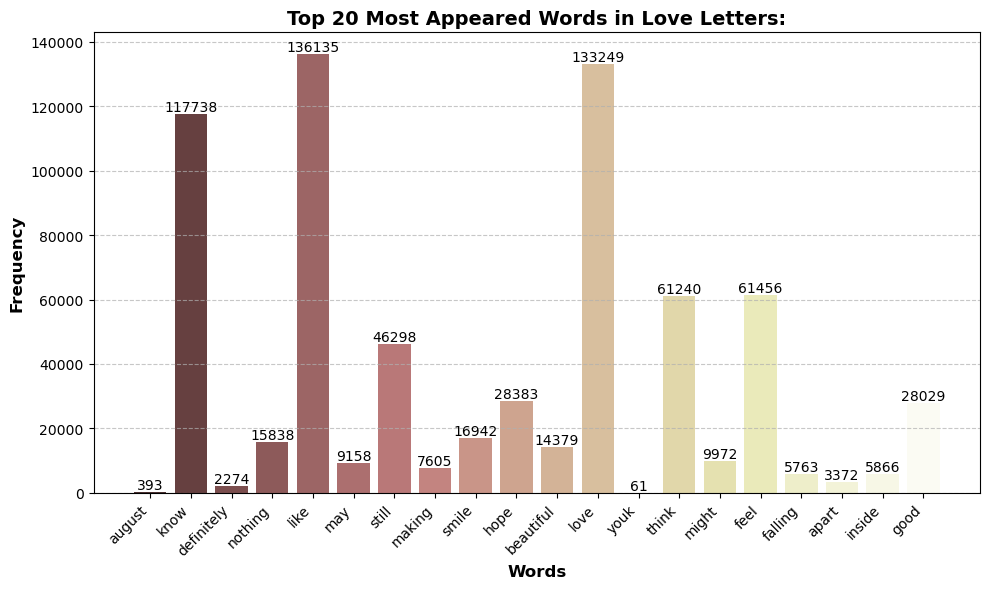

In [11]:
#Visualisation 1: 
# Flatten the list of tokens
all_tokens = [token for sublist in df['cleaned_letter_tokens'] for token in sublist]

# Count the frequency of each word
word_counts = Counter(all_tokens)

# Rank the words by frequency
word_ranks = {word: rank + 1 for rank, (word, _) in enumerate(word_counts.most_common())}

# Plotting the bar chart
top_words = list(word_counts.keys())[:20]  # Get the top 10 words
top_counts = [word_counts[word] for word in top_words]

colors = sns.color_palette("pink", n_colors=len(top_words))

# Customize the style of the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(top_words, top_counts, color=colors)  # Using the defined color palette
plt.xlabel('Words', fontsize=12, fontweight='bold')  # Customizing label font size and weight
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Top 20 Most Appeared Words in Love Letters:', fontsize=14, fontweight='bold')  # Customizing title font size and weight
plt.xticks(rotation=45, ha='right', fontsize=10)  # Customizing x-axis tick font size and rotation
plt.yticks(fontsize=10)  # Customizing y-axis tick font size
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding gridlines to y-axis
plt.tight_layout()

# Adding frequency labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

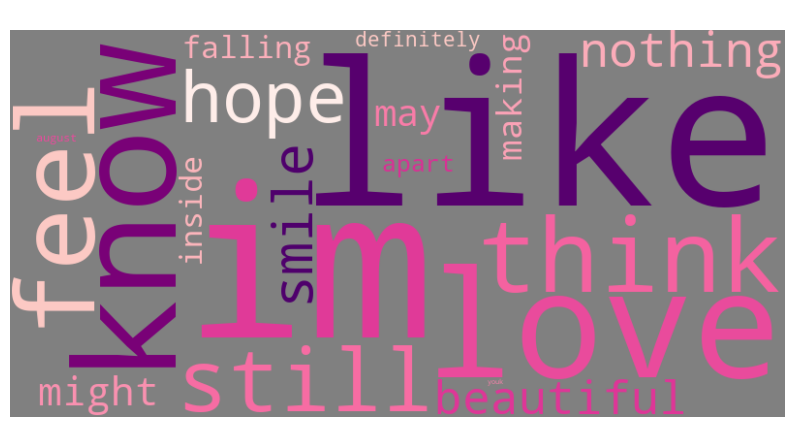

In [12]:
#visulation 2:

# Your DataFrame with word frequencies
data = {
    'Word': ['august', 'know', 'definitely', 'nothing', 'like', 'may', 'still', 'making', 'smile', 'hope',
             'beautiful', 'love', 'youk', 'think', 'might', 'feel', 'im', 'falling', 'apart', 'inside'],
    'Frequency': [393, 117738, 2274, 15838, 136135, 9158, 46298, 7605, 16942, 28383, 14379, 133249, 61, 61240,
                  9972, 61456, 149831, 5763, 3372, 5866]
}

df1 = pd.DataFrame(data)

# Generate a dictionary with word frequencies
word_freq_dict = dict(zip(df1['Word'], df1['Frequency']))

# Create the word cloud object with customized colors
wordcloud = WordCloud(width=800, height=400, background_color='gray', colormap='RdPu').generate_from_frequencies(word_freq_dict)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Frequencies', color='white')  # Set title color to white
plt.show()

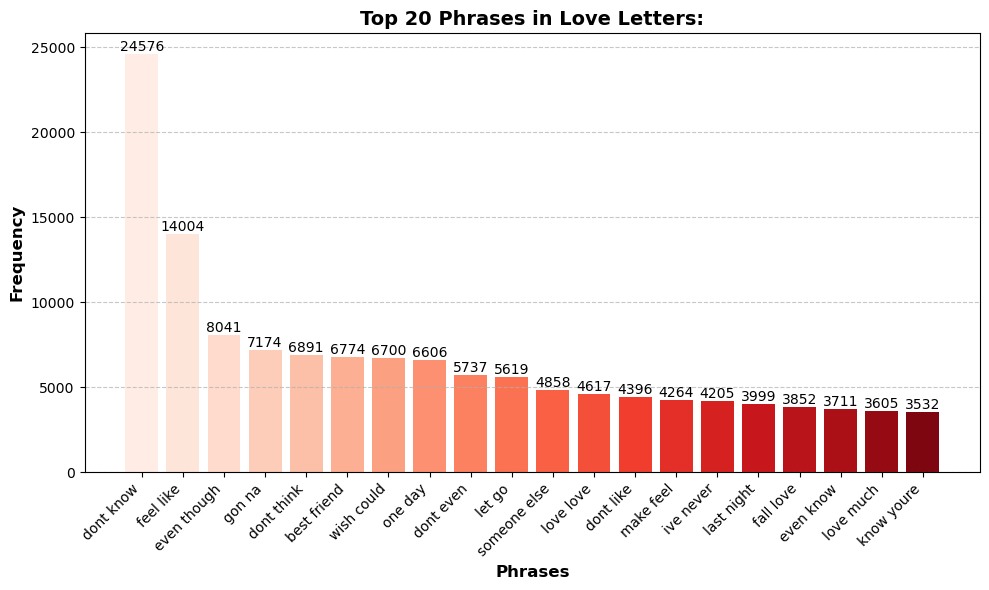

In [13]:
#visulization 3: 
# Function to extract n-grams from tokens
def extract_ngrams(tokens, n):
    return list(ngrams(tokens, n))

# Apply n-gram extraction to each letter
df['ngrams'] = df['cleaned_letter_tokens'].apply(lambda x: extract_ngrams(x, 2))  # Change 2 to desired n-gram length

# Flatten the list of n-grams
all_ngrams = [ngram for sublist in df['ngrams'] for ngram in sublist]

# Count the frequency of each n-gram
ngram_counts = Counter(all_ngrams)

# Rank the n-grams by frequency
top_ngrams = ngram_counts.most_common(20)  # Get the top 10 n-grams

# Plotting the bar chart
ngram_labels = [' '.join(ngram) for ngram, _ in top_ngrams]
ngram_counts = [count for _, count in top_ngrams]

colors = sns.color_palette("Reds", n_colors=len(ngram_labels))

plt.figure(figsize=(10, 6))
bars = plt.bar(ngram_labels, ngram_counts, color=colors)  # Using the defined color palette
plt.xlabel('Phrases', fontsize=12, fontweight='bold')  # Customizing label font size and weight
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Top 20 Phrases in Love Letters:', fontsize=14, fontweight='bold')  # Customizing title font size and weight
plt.xticks(rotation=45, ha='right', fontsize=10)  # Customizing x-axis tick font size and rotation
plt.yticks(fontsize=10)  # Customizing y-axis tick font size
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding gridlines to y-axis
plt.tight_layout()

# Adding frequency labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

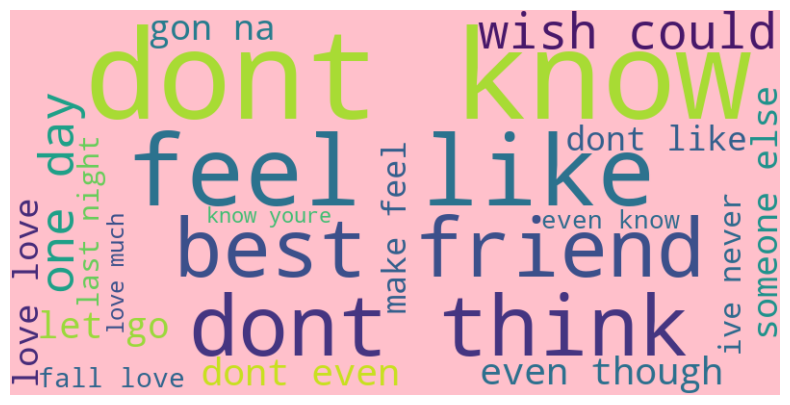

In [17]:
#visualization 4:
word_frequencies = {
    'dont know': 24576, 'feel like ': 14004, 'even though': 8041, 'gon na':7174, 'dont think': 10000,
    'best friend': 9500, 'wish could': 9000, 'one day': 8500, 'dont even': 8000, 'let go': 7500,
    'someone else': 7000, 'love love': 6500, 'dont like': 6000, 'make feel': 5500, 'ive never': 5000,
    'last night': 4500, 'fall love': 4000, 'even know': 3500, 'love much': 3000, 'know youre': 2500
}

# Generating a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='pink').generate_from_frequencies(word_frequencies)

# Display the generated image with matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axis for a clean look
plt.show()

In [18]:
df

,id,letter,cleaned_letter,cleaned_letter_tokens,ngrams,sentiment_scores
0,499457,"<p>A,</p>\n<p> </p>\n<p>Today is August 28th. ...",is august i know that its definitely nothing l...,"[august, know, definitely, nothing, like, may,...","[(august, know), (know, definitely), (definite...",0.9799
1,499458,<p>I think I might love you....</p>,i think i might love you,"[think, might, love]","[(think, might), (might, love)]",0.6369
2,499459,<p>I feel like I'm falling apart on the inside...,i feel like falling apart on the inside and so...,"[feel, like, falling, apart, inside, good, hid...","[(feel, like), (like, falling), (falling, apar...",-0.0316
3,499460,<p>We started talking again and I danced on yo...,we started talking again and i danced on you a...,"[started, talking, danced, drunkenly, fed, dip...","[(started, talking), (talking, danced), (dance...",0.9233
4,499461,<p>Your dimples are pretty adorable. <br>But y...,your are pretty adorable but youre a million c...,"[pretty, adorable, youre, million, cuter, come...","[(pretty, adorable), (adorable, youre), (youre...",0.8945
...,...,...,...,...,...,...
366639,893646,<p>It’s really hard to write here anymore. The...,its really hard to write here anymore theres h...,"[really, hard, write, anymore, theres, hardly,...","[(really, hard), (hard, write), (write, anymor...",-0.6198
366640,893647,<p>I missed you. I feel like I know how to han...,i missed you i feel like i know how to handle ...,"[missed, feel, like, know, handle, feelings, e...","[(missed, feel), (feel, like), (like, know), (...",0.6908
366641,893648,<p>Very cute. Nice try</p>,very cute nice try,"[cute, nice, try]","[(cute, nice), (nice, try)]",0.7485
366642,893649,"<p>Omie,</p><p>We aren't in contact with one a...",omiewe arent in contact with one another and t...,"[omiewe, arent, contact, one, another, thats, ...","[(omiewe, arent), (arent, contact), (contact, ...",0.3818


In [13]:
#Sentimental Analysis 

In [19]:
# 1. Rule-based models
download('vader_lexicon')

sia = SentimentIntensityAnalyzer()



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/chandanasy/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Positive Letters:
Letter: is august i know that its definitely nothing like may but its still making me smile i hope you smile you have a beautiful smile i love youk
Sentiment Score: 0.9799
-------------------------------------------
Letter: i think i might love you
Sentiment Score: 0.6369
-------------------------------------------
Letter: we started talking again and i danced on you and you drunkenly fed me dip n dots we give eachother awkward smiles and you do that cute little laugh when i have to ask you what something means this has to be fate bringing you back to me it just has to be i you and only you pretty please
Sentiment Score: 0.9233
-------------------------------------------
Letter: your are pretty adorable but youre a million cuter when they come out when you play euph
Sentiment Score: 0.8945
-------------------------------------------
Letter: happy birthday yam i know my post is about six minutes past ur birthday but i just to leave a message here and also to let u know

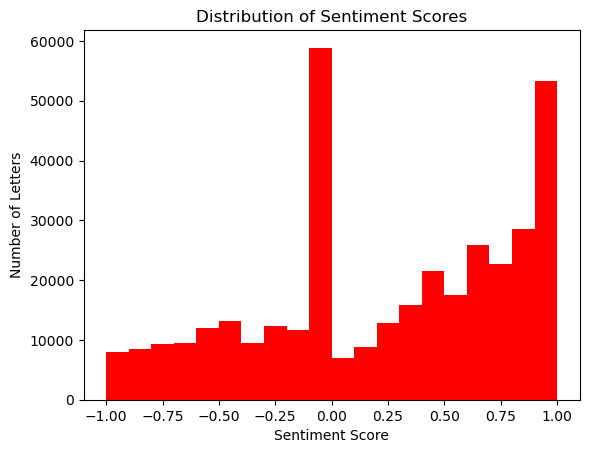

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the letters
# 'cleaned_letter' contains the text of the letters

# Apply sentiment analysis using VADER
df['sentiment_scores'] = df['cleaned_letter'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Separate letters into positive, negative, and neutral categories
positive_letters = df[df['sentiment_scores'] > 0].head(5)
negative_letters = df[df['sentiment_scores'] < 0].head(5)
neutral_letters = df[df['sentiment_scores'] == 0].head(5)

# Display positive letters
print("Positive Letters:")
for index, row in positive_letters.iterrows():
    print("Letter:", row['cleaned_letter'])
    print("Sentiment Score:", row['sentiment_scores'])
    print("-------------------------------------------")

# Display negative letters
print("Negative Letters:")
for index, row in negative_letters.iterrows():
    print("Letter:", row['cleaned_letter'])
    print("Sentiment Score:", row['sentiment_scores'])
    print("-------------------------------------------")

# Display neutral letters
print("Neutral Letters:")
for index, row in neutral_letters.iterrows():
    print("Letter:", row['cleaned_letter'])
    print("Sentiment Score:", row['sentiment_scores'])
    print("-------------------------------------------")

# Plot histogram of sentiment scores
plt.hist(df['sentiment_scores'], bins=20, color='red')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Letters')
plt.show()


In [20]:
df

,id,letter,cleaned_letter,cleaned_letter_tokens,ngrams,sentiment_scores
0,499457,"<p>A,</p>\n<p> </p>\n<p>Today is August 28th. ...",is august i know that its definitely nothing l...,"[august, know, definitely, nothing, like, may,...","[(august, know), (know, definitely), (definite...",0.9799
1,499458,<p>I think I might love you....</p>,i think i might love you,"[think, might, love]","[(think, might), (might, love)]",0.6369
2,499459,<p>I feel like I'm falling apart on the inside...,i feel like falling apart on the inside and so...,"[feel, like, falling, apart, inside, good, hid...","[(feel, like), (like, falling), (falling, apar...",-0.0316
3,499460,<p>We started talking again and I danced on yo...,we started talking again and i danced on you a...,"[started, talking, danced, drunkenly, fed, dip...","[(started, talking), (talking, danced), (dance...",0.9233
4,499461,<p>Your dimples are pretty adorable. <br>But y...,your are pretty adorable but youre a million c...,"[pretty, adorable, youre, million, cuter, come...","[(pretty, adorable), (adorable, youre), (youre...",0.8945
...,...,...,...,...,...,...
366639,893646,<p>It’s really hard to write here anymore. The...,its really hard to write here anymore theres h...,"[really, hard, write, anymore, theres, hardly,...","[(really, hard), (hard, write), (write, anymor...",-0.6198
366640,893647,<p>I missed you. I feel like I know how to han...,i missed you i feel like i know how to handle ...,"[missed, feel, like, know, handle, feelings, e...","[(missed, feel), (feel, like), (like, know), (...",0.6908
366641,893648,<p>Very cute. Nice try</p>,very cute nice try,"[cute, nice, try]","[(cute, nice), (nice, try)]",0.7485
366642,893649,"<p>Omie,</p><p>We aren't in contact with one a...",omiewe arent in contact with one another and t...,"[omiewe, arent, contact, one, another, thats, ...","[(omiewe, arent), (arent, contact), (contact, ...",0.3818


In [17]:
print(df['cleaned_letter_tokens'].dtype)
print(df['ngrams'].dtype)


object
object


In [18]:
def safe_eval(x):
    try:
        return eval(x) if isinstance(x, str) else x
    except:
        return x  # Optionally, handle the error or return a default value

cleaned_letter_tokens = df['cleaned_letter_tokens'].apply(safe_eval)
ngrams = df['ngrams'].apply(safe_eval)


In [19]:
# Combine tokens and n-grams into a single string per document
combined_texts = []
for tokens, ngs in zip(cleaned_letter_tokens, ngrams):
    ngs_joined = [' '.join(ng) for ng in ngs]  # Join each n-gram into a single string
    combined_text = ' '.join(tokens + ngs_joined)  # Combine tokens and n-grams
    combined_texts.append(combined_text)


In [20]:
#tf-idf vectorisation 
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english', ngram_range=(1, 2))
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_texts)


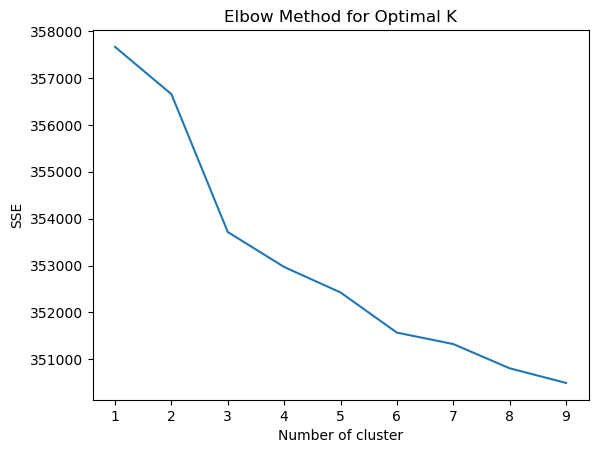

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming 'tfidf_matrix' is your data transformed by TF-IDF
sse = {}  # Sum of squared distances
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(tfidf_matrix)
    sse[k] = kmeans.inertia_  # Inertia: Sum of squared distances of samples to their closest cluster center

# Plotting the Elbow
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal K")
plt.show()


In [22]:
#we see that the elbow isn't very pronunced. 

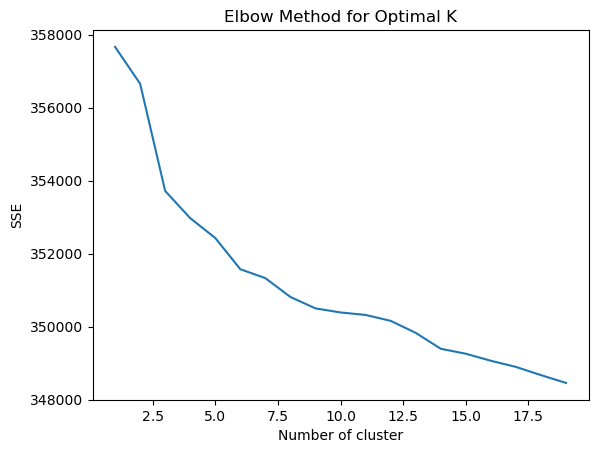

In [23]:
#increasing cluster range and testing 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming 'tfidf_matrix' is your data transformed by TF-IDF
sse = {}  # Sum of squared distances
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(tfidf_matrix)
    sse[k] = kmeans.inertia_  # Inertia: Sum of squared distances of samples to their closest cluster center

# Plotting the Elbow
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal K")
plt.show()


In [24]:
#using elbow method looks like k=4 is most optimal value 
#From our elbow plot, it seems like the SSE decreases rapidly until around k=4 and then starts to level off. So, the elbow of the plot and hence the optimal number of clusters could be around 4. However, the plot is not very clear, and there isn't a sharp elbow, which is a common scenario in real-world data.

In [25]:
#testing out silhoutte method to get more clarity

In [26]:
from sklearn.cluster import KMeans


n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Assignments of documents to clusters
cluster_assignments = kmeans.labels_


In [27]:
# Example to print top terms per cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()

for i in range(n_clusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:  # Top 10 words for each cluster
        print(' %s' % terms[ind])
    print()


Cluster 0:
 love
 love love
 love way
 dont love
 love dont
 dont
 ill love
 way
 say love
 love know

Cluster 1:
 love
 love love
 know
 dont
 fall
 like
 think
 youre
 way
 life

Cluster 2:
 miss
 youre
 like
 think
 day
 wish
 really
 heart
 make
 good

Cluster 3:
 dont
 like
 know
 feel
 think
 really
 like like
 dont know
 dont dont
 know know



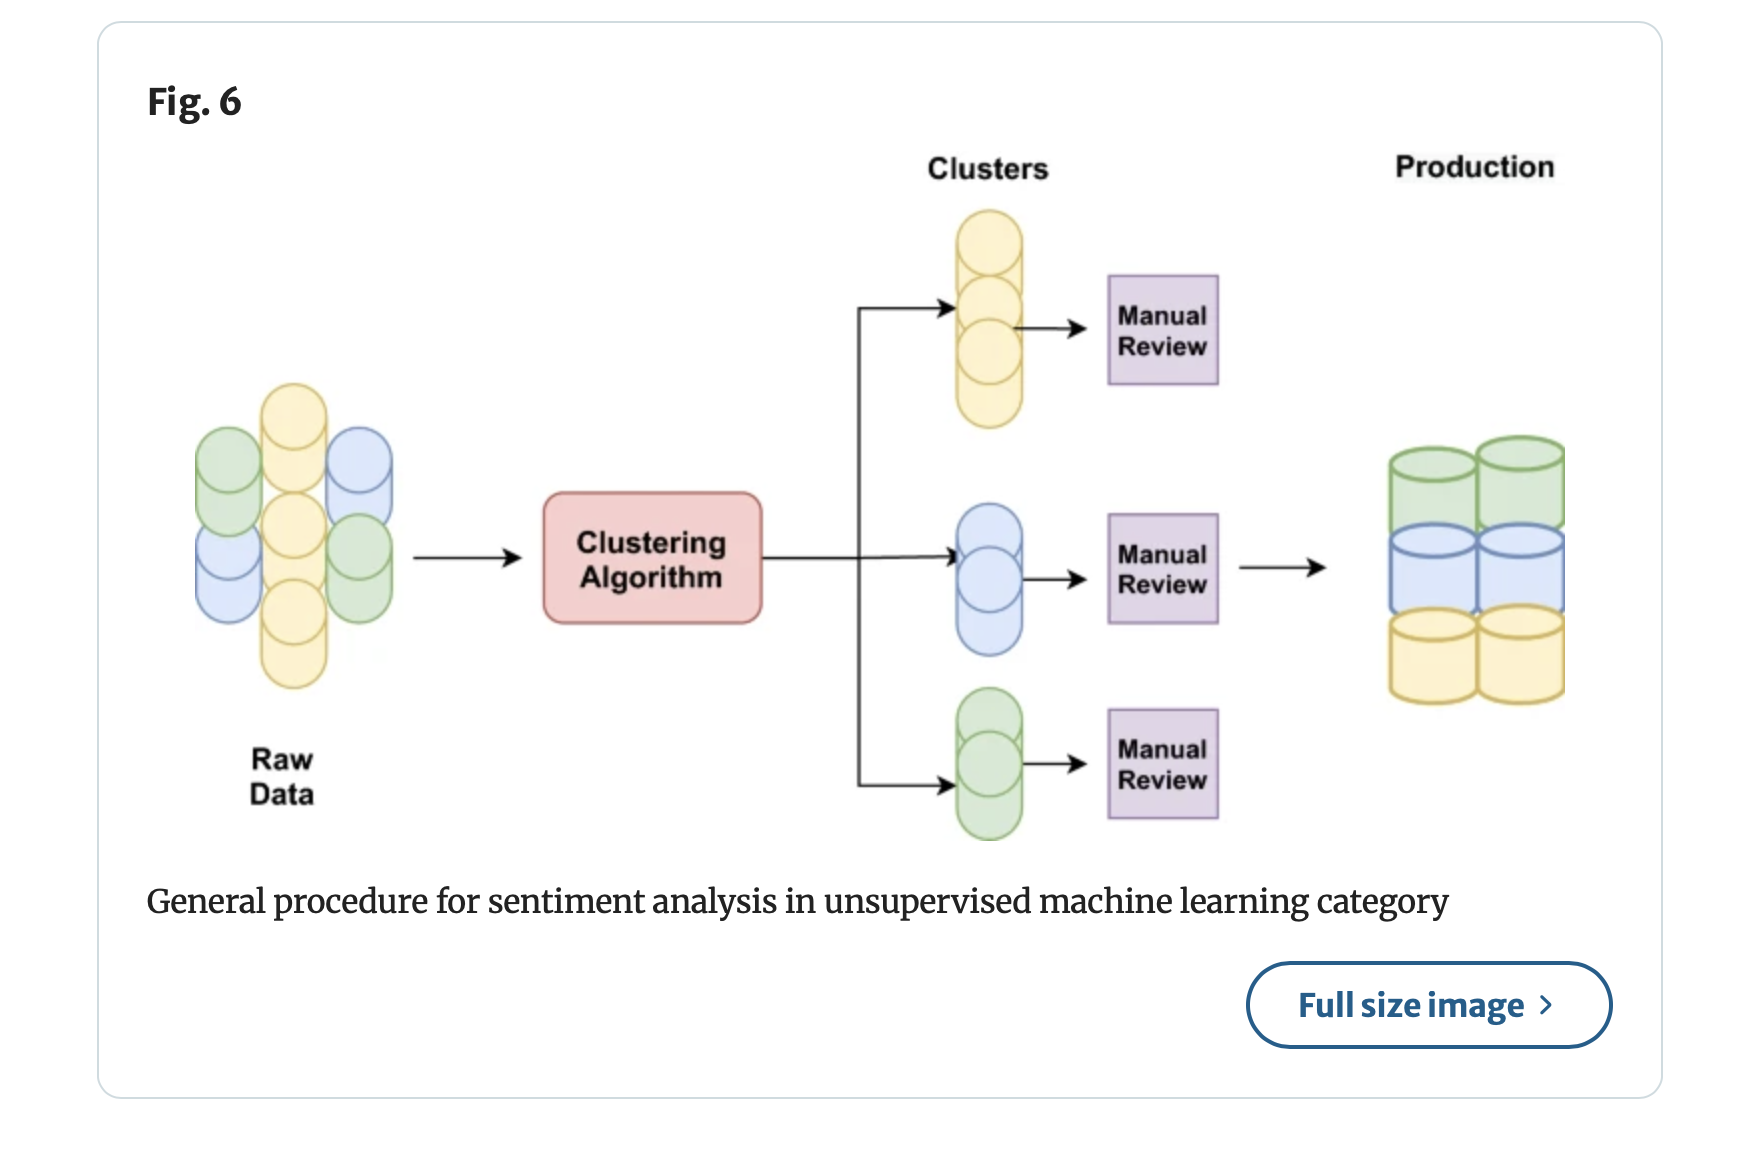

Ref: https://link.springer.com/article/10.1007/s10462-022-10144-1

In [28]:
df

,id,letter,cleaned_letter,cleaned_letter_tokens,ngrams,sentiment_scores
0,499457,"<p>A,</p>\n<p> </p>\n<p>Today is August 28th. ...",is august i know that its definitely nothing l...,"[august, know, definitely, nothing, like, may,...","[(august, know), (know, definitely), (definite...",0.9799
1,499458,<p>I think I might love you....</p>,i think i might love you,"[think, might, love]","[(think, might), (might, love)]",0.6369
2,499459,<p>I feel like I'm falling apart on the inside...,i feel like falling apart on the inside and so...,"[feel, like, falling, apart, inside, good, hid...","[(feel, like), (like, falling), (falling, apar...",-0.0316
3,499460,<p>We started talking again and I danced on yo...,we started talking again and i danced on you a...,"[started, talking, danced, drunkenly, fed, dip...","[(started, talking), (talking, danced), (dance...",0.9233
4,499461,<p>Your dimples are pretty adorable. <br>But y...,your are pretty adorable but youre a million c...,"[pretty, adorable, youre, million, cuter, come...","[(pretty, adorable), (adorable, youre), (youre...",0.8945
...,...,...,...,...,...,...
366639,893646,<p>It’s really hard to write here anymore. The...,its really hard to write here anymore theres h...,"[really, hard, write, anymore, theres, hardly,...","[(really, hard), (hard, write), (write, anymor...",-0.6198
366640,893647,<p>I missed you. I feel like I know how to han...,i missed you i feel like i know how to handle ...,"[missed, feel, like, know, handle, feelings, e...","[(missed, feel), (feel, like), (like, know), (...",0.6908
366641,893648,<p>Very cute. Nice try</p>,very cute nice try,"[cute, nice, try]","[(cute, nice), (nice, try)]",0.7485
366642,893649,"<p>Omie,</p><p>We aren't in contact with one a...",omiewe arent in contact with one another and t...,"[omiewe, arent, contact, one, another, thats, ...","[(omiewe, arent), (arent, contact), (contact, ...",0.3818


In [29]:
#trying out unsupervised DL 
all_tokens_list_of_lists = df['cleaned_letter_tokens'].tolist()


In [30]:
all_tokens_list_of_lists

[['august',
  'know',
  'definitely',
  'nothing',
  'like',
  'may',
  'still',
  'making',
  'smile',
  'hope',
  'smile',
  'beautiful',
  'smile',
  'love',
  'youk'],
 ['think', 'might', 'love'],
 ['feel',
  'like',
  'falling',
  'apart',
  'inside',
  'good',
  'hiding',
  'nobody',
  'seehow',
  'many',
  'days',
  'survive',
  'shoving',
  'pain',
  'patching',
  'wounds'],
 ['started',
  'talking',
  'danced',
  'drunkenly',
  'fed',
  'dip',
  'n',
  'dots',
  'give',
  'eachother',
  'awkward',
  'smiles',
  'cute',
  'little',
  'laugh',
  'ask',
  'something',
  'means',
  'fate',
  'bringing',
  'back',
  'pretty',
  'please'],
 ['pretty', 'adorable', 'youre', 'million', 'cuter', 'come', 'play', 'euph'],
 ['happy',
  'birthday',
  'yam',
  'know',
  'post',
  'six',
  'minutes',
  'past',
  'ur',
  'birthday',
  'leave',
  'message',
  'also',
  'let',
  'u',
  'know',
  'happy',
  'youre',
  'part',
  'life',
  'mean',
  'life',
  'god',
  'gave',
  'perfect',
  'dont',

In [21]:
exp1 = pd.read_csv("evan_letters_main_letters.csv")

In [22]:
exp1

,id,letter,date,lang,country,region
0,499457,"<p>A,</p>\n<p> </p>\n<p>Today is August 28th. ...",2013-08-28 10:45:23,en-US,NaN,NaN
1,499458,<p>I think I might love you....</p>,2013-08-28 11:04:04,en-US,NaN,NaN
2,499459,<p>I feel like I'm falling apart on the inside...,2013-08-28 11:52:33,en-US,NaN,NaN
3,499460,<p>We started talking again and I danced on yo...,2013-08-28 11:55:46,en-US,NaN,NaN
4,499461,<p>Your dimples are pretty adorable. <br>But y...,2013-08-28 12:11:31,en-US,NaN,NaN
...,...,...,...,...,...,...
366639,893646,<p>It’s really hard to write here anymore. The...,2022-04-24 21:39:30,en-US,NaN,NaN
366640,893647,<p>I missed you. I feel like I know how to han...,2022-04-24 21:39:50,en-US,NaN,NaN
366641,893648,<p>Very cute. Nice try</p>,2022-04-24 21:46:24,en-US,NaN,NaN
366642,893649,"<p>Omie,</p><p>We aren't in contact with one a...",2022-04-24 21:55:25,en-US,NaN,NaN


In [23]:
from transformers import pipeline

# Load a pre-trained text classification model
classifier = pipeline("text-classification", model="distilbert-base-uncased-finetuned-sst-2-english")

# Predict the category of a single text
result = classifier("I feel happy when I'm coding.")
print(result)

# Apply to your dataset (consider batching for efficiency)
df['category'] = df['cleaned_letter'].apply(lambda text: classifier(text)[0]['label'])


RuntimeError: KeyboardInterrupt: <EMPTY MESSAGE>

In [ ]:
from transformers import pipeline
import pandas as pd
import numpy as np

# Load a pre-trained text classification model
classifier = pipeline("text-classification", model="distilbert-base-uncased-finetuned-sst-2-english")

# Sample DataFrame creation (remove this line if you already have a DataFrame)
# df = pd.DataFrame({'cleaned_letter': ["I feel happy when I'm coding.", "I am sad.", "I love machine learning."]})

def classify_texts_in_batches(texts, batch_size=10):
    """
    Classify texts in batches to improve efficiency.
    
    Args:
    - texts (list): A list of texts to classify.
    - batch_size (int): The number of texts to process in each batch.
    
    Returns:
    - A list of predicted categories for each text.
    """
    categories = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        print(f"Classifying batch {i//batch_size + 1}/{np.ceil(len(texts)/batch_size)}...")
        batch_results = classifier(batch)
        batch_categories = [result['label'] for result in batch_results]
        categories.extend(batch_categories)
    return categories

# Applying classification in batches
print("Starting classification...")
df['category'] = classify_texts_in_batches(df['cleaned_letter'].tolist(), batch_size=10)  # Adjust batch_size based on your available memory and speed requirements

print("Classification completed.")


In [28]:
# Using pip
!pip install --upgrade torch torchvision




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.8/150.8 MB 5.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 24.2 MB/s eta 0:00:0000:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.3.0
    Uninstalling typing_extensions-4.3.0:
      Successfully uninstalled typing_extensions-4.3.0
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1
    Uninstalling torch-1.13.1:
      Successfully uninstalled torch-1.13.1
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.1
    Uninstalling torchvision-0.14.1:
      Successfully uninstalled torchvision-0.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 0.13.1 requires torch==1.13.1, but you have torch 2.2.0 which is incompatible.

[notice] A new release of pip is avai

In [30]:
pip install --upgrade transformers



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
def categorize_by_keyword(text):
    if any(word in text for word in ['love', 'relationship', 'affection']):
        return 'Relationships'
    elif any(word in text for word in ['sad', 'depressed', 'anxiety']):
        return 'Mental Health'
    # Add more conditions as needed
    else:
        return 'Other'

df['category'] = df['cleaned_letter'].apply(categorize_by_keyword)


In [11]:
df

,id,letter,cleaned_letter,cleaned_letter_tokens,category
0,499457,"<p>A,</p>\n<p> </p>\n<p>Today is August 28th. ...",is august i know that its definitely nothing l...,"[august, know, definitely, nothing, like, may,...",Relationships
1,499458,<p>I think I might love you....</p>,i think i might love you,"[think, might, love]",Relationships
2,499459,<p>I feel like I'm falling apart on the inside...,i feel like falling apart on the inside and so...,"[feel, like, falling, apart, inside, good, hid...",Other
3,499460,<p>We started talking again and I danced on yo...,we started talking again and i danced on you a...,"[started, talking, danced, drunkenly, fed, dip...",Other
4,499461,<p>Your dimples are pretty adorable. <br>But y...,your are pretty adorable but youre a million c...,"[pretty, adorable, youre, million, cuter, come...",Other
...,...,...,...,...,...
366639,893646,<p>It’s really hard to write here anymore. The...,its really hard to write here anymore theres h...,"[really, hard, write, anymore, theres, hardly,...",Other
366640,893647,<p>I missed you. I feel like I know how to han...,i missed you i feel like i know how to handle ...,"[missed, feel, like, know, handle, feelings, e...",Other
366641,893648,<p>Very cute. Nice try</p>,very cute nice try,"[cute, nice, try]",Other
366642,893649,"<p>Omie,</p><p>We aren't in contact with one a...",omiewe arent in contact with one another and t...,"[omiewe, arent, contact, one, another, thats, ...",Other


In [12]:
import gensim 

In [13]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

print("Starting preprocessing of text...")
# Sample preprocessing function
def preprocess_text(text):
    return [word for word in word_tokenize(text.lower()) if word not in STOPWORDS and word.isalnum()]

# Preprocess the documents
processed_docs = df['cleaned_letter'].map(preprocess_text)
print("Preprocessing completed.")

print("Creating dictionary...")
# Create a dictionary representation of the documents
dictionary = Dictionary(processed_docs)
print("Dictionary created.")

print("Filtering extremes in dictionary...")
# Filter out extremes to limit the number of features
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
print("Extremes filtered.")

print("Converting documents to vectors...")
# Convert processed_docs to a vectorized form
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
print("Conversion to vectors completed.")

print("Training LDA model...")
# Train the LDA model
lda_model = LdaModel(bow_corpus, num_topics=10, id2word=dictionary, passes=10)
print("LDA model trained.")

print("Assigning topics to documents...")
# Assign topics to documents
df['topic'] = [sorted(lda_model[bow], key=lambda x: -x[1])[0][0] for bow in bow_corpus]
print("Topics assigned to documents.")


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chandanasy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Starting preprocessing of text...
Preprocessing completed.
Creating dictionary...
Dictionary created.
Filtering extremes in dictionary...
Extremes filtered.
Converting documents to vectors...
Conversion to vectors completed.
Training LDA model...
LDA model trained.
Assigning topics to documents...
Topics assigned to documents.


In [14]:
df

,id,letter,cleaned_letter,cleaned_letter_tokens,category,topic
0,499457,"<p>A,</p>\n<p> </p>\n<p>Today is August 28th. ...",is august i know that its definitely nothing l...,"[august, know, definitely, nothing, like, may,...",Relationships,6
1,499458,<p>I think I might love you....</p>,i think i might love you,"[think, might, love]",Relationships,4
2,499459,<p>I feel like I'm falling apart on the inside...,i feel like falling apart on the inside and so...,"[feel, like, falling, apart, inside, good, hid...",Other,8
3,499460,<p>We started talking again and I danced on yo...,we started talking again and i danced on you a...,"[started, talking, danced, drunkenly, fed, dip...",Other,2
4,499461,<p>Your dimples are pretty adorable. <br>But y...,your are pretty adorable but youre a million c...,"[pretty, adorable, youre, million, cuter, come...",Other,6
...,...,...,...,...,...,...
366639,893646,<p>It’s really hard to write here anymore. The...,its really hard to write here anymore theres h...,"[really, hard, write, anymore, theres, hardly,...",Other,8
366640,893647,<p>I missed you. I feel like I know how to han...,i missed you i feel like i know how to handle ...,"[missed, feel, like, know, handle, feelings, e...",Other,8
366641,893648,<p>Very cute. Nice try</p>,very cute nice try,"[cute, nice, try]",Other,2
366642,893649,"<p>Omie,</p><p>We aren't in contact with one a...",omiewe arent in contact with one another and t...,"[omiewe, arent, contact, one, another, thats, ...",Other,8


In [15]:
print("Identified topics:")
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

Identified topics:
(0, '0.117*"hate" + 0.086*"fuck" + 0.084*"fucking" + 0.080*"shit" + 0.037*"damn"')
(1, '0.164*"color" + 0.100*"roboto" + 0.049*"14pxchar59" + 0.048*"rgb77" + 0.048*"86char59"')
(2, '0.023*"like" + 0.014*"didnt" + 0.014*"friends" + 0.013*"said" + 0.012*"years"')
(3, '0.042*"na" + 0.028*"hope" + 0.020*"gon" + 0.019*"day" + 0.018*"letters"')
(4, '0.237*"love" + 0.024*"loved" + 0.024*"life" + 0.017*"man" + 0.015*"fall"')
(5, '0.105*"miss" + 0.043*"wish" + 0.033*"u" + 0.020*"ko" + 0.018*"pinkfluffyclouds"')
(6, '0.026*"like" + 0.020*"eyes" + 0.017*"look" + 0.010*"way" + 0.010*"smile"')
(7, '0.145*"new" + 0.130*"81" + 0.059*"transparentchar59" + 0.058*"backgroundcolor" + 0.030*"x"')
(8, '0.048*"dont" + 0.042*"know" + 0.032*"like" + 0.026*"feel" + 0.019*"think"')
(9, '0.044*"heart" + 0.011*"mind" + 0.009*"mo" + 0.009*"soul" + 0.008*"words"')


#opic 0: This seems to focus on negative emotions or expressions of frustration, with words like "hate," "fuck," "fucking," "shit," and "damn."
Topic 1: Appears to be related to technical or formatting aspects, possibly from HTML or CSS content within the letters, with words like "color," "roboto" (a font), and other style-related tokens.
Topic 2: Centers around interpersonal relationships or experiences, with words like "like," "didn't," "friends," "said," and "years."
Topic 3: May involve aspirations or reflective thoughts, with words such as "na," "hope," "gon" (going), "day," and "letters."
Topic 4: Clearly revolves around love and affection, with a strong emphasis on "love," and related words like "loved," "life," "man," and "fall."
Topic 5: Focuses on longing or missing someone, with "miss," "wish," "u" (you), and other personal tokens.
Topic 6: Seems to describe physical appearance or impressions, with "like," "eyes," "look," "way," and "smile."
Topic 7: Similar to Topic 1, this appears to be influenced by technical or style-related content, with "new," "81," "transparentchar59," "backgroundcolor," and "x."
Topic 8: Relates to introspection or existential thoughts, with "don't," "know," "like," "feel," and "think."
Topic 9: Deals with deeper emotional or spiritual elements, with "heart," "mind," "mo" (more?), "soul," and "words."

In [16]:
pip install pyldavis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.8 MB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 31.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 36.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Preparing the visualization
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, bow_corpus, dictionary)

# Displaying the visualization
pyLDAvis.display(vis)


/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' 

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Us

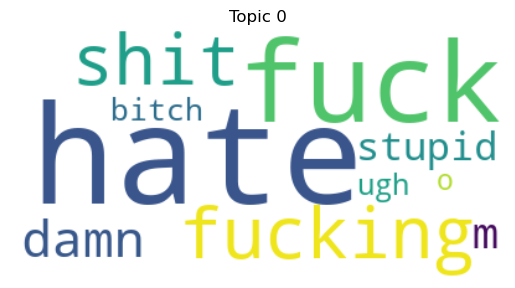

/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:523: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:523: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
/Users/chandanasy/opt/anaconda3/lib/python3.9/site

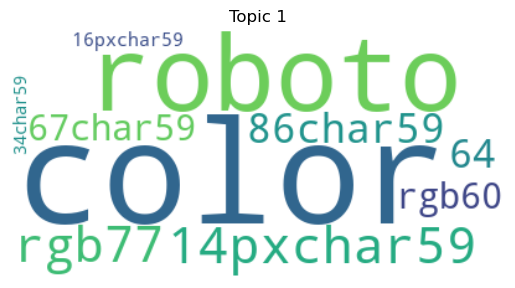

/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:523: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead

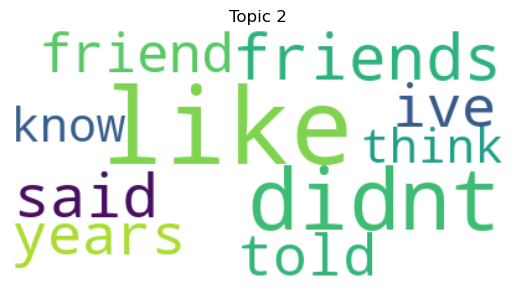

/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead

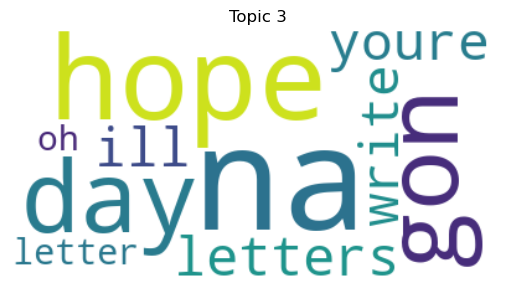

/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Us

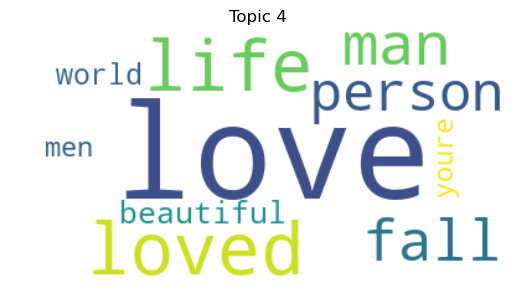

/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:523: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead

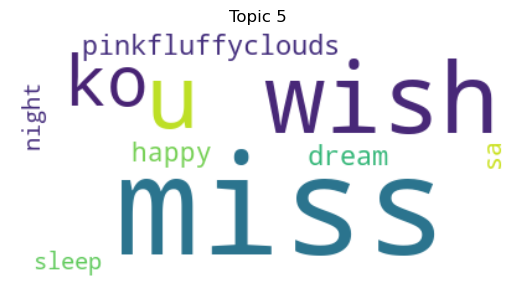

/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Us

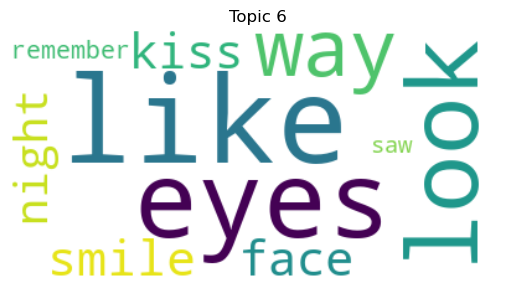

/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else


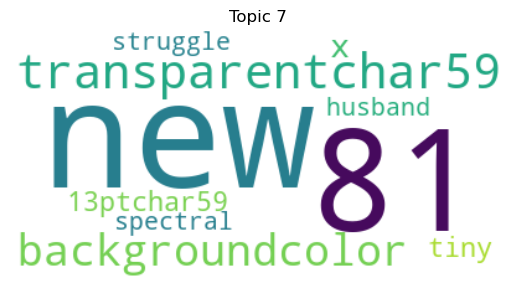

/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:523: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead

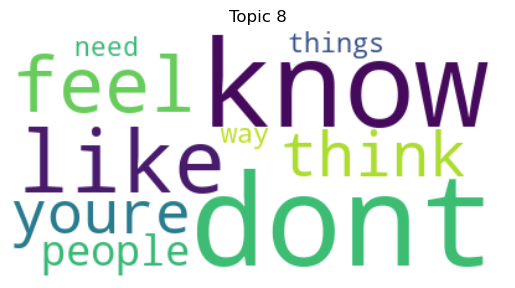

/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/chandanasy/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Us

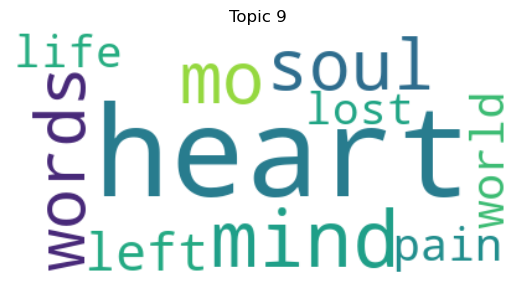

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the topics with their top words and weights
topics = lda_model.show_topics(formatted=False)

# Plotting word clouds for each topic
for topic_id, topic in topics:
    wordcloud = WordCloud(background_color='white').fit_words(dict(topic))
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_id}')
    plt.axis('off')
    plt.show()
